In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)

In [2]:
#read in the ams data on XXX
#numerator='B'
#denominator='O'
#path='C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'

def read_in_data(numerator,denominator,path):
    extension='ams_data.csv'
    read_file=path+numerator+'_'+denominator+'_'+extension
    ams=pd.read_csv(read_file)
    print(ams.head())
    return ams
#join low and high together as one array to be used as x error bars
#ams_energy=np.array((ams.EK_low.values,ams.Ek_high.values.T))
#ams_energy=ams_energy*1000
#ams_energy_mp=(ams_energy[0,:]+ams_energy[1,:])/2.0
# now make the error bar sizes (symmetric about these midpoints)
#ams_energy_binsize=(ams_energy[1,:]-ams_energy[0,:])/2.0
#make the ratio an array
#ams_ratio=np.array(ams._3He_over_4He.values * ams._factor_ratio.values)

In [3]:
numerator='B'
denominator='O'
path='C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'
df=read_in_data(numerator,denominator,path)

   R_low  R_high  _B_O_ratio   _stat    _acc    _unf  _scale    _sys
0   2.15    2.40      0.3071  0.0015  0.0143  0.0034  0.0003  0.0147
1   2.40    2.67      0.3261  0.0015  0.0137  0.0030  0.0002  0.0140
2   2.67    2.97      0.3322  0.0014  0.0126  0.0026  0.0001  0.0129
3   2.97    3.29      0.3352  0.0013  0.0117  0.0022  0.0001  0.0119
4   3.29    3.64      0.3400  0.0013  0.0109  0.0019  0.0000  0.0111


In [4]:
def make_energies_and_errors(df,num,den):
    rigidity=np.array((df.R_low.values,df.R_high.values.T))
    rigidity_mp=(rigidity[0,:]+rigidity[1,:])/2.0
    rigidity_binsize=(rigidity[1,:]-rigidity[0,:])/2.0
    ratio_name='_'+str(num)+'_'+str(den)+'_'+'ratio'
    ratio=np.array(df[ratio_name].values)
    ratio_sys_errors=np.array(df._sys.values)
    ratio_stat_errors=np.array(df._stat.values)
    ratio_errors=np.sqrt(np.square(ratio_stat_errors)+np.square(ratio_sys_errors))
    return rigidity_mp,rigidity_binsize,ratio,ratio_errors

In [5]:
rigidity,rigidity_binsize,ratio,ratio_errors=make_energies_and_errors(df,numerator,denominator)

In [7]:
rigidity[0]
rigidity_binsize[0]
ratio[0]
df.tail()

,R_low,R_high,_B_O_ratio,_stat,_acc,_unf,_scale,_sys
61,441.0,525.0,0.0735,0.0052,0.0028,0.0023,0.0005,0.0036
62,525.0,660.0,0.0771,0.0056,0.0029,0.0030,0.0005,0.0042
63,660.0,880.0,0.0645,0.0055,0.0026,0.0033,0.0005,0.0042
64,880.0,1300.0,0.0655,0.0061,0.0026,0.0048,0.0006,0.0055
65,1300.0,3300.0,0.0393,0.0110,0.0022,0.0028,0.0004,0.0036


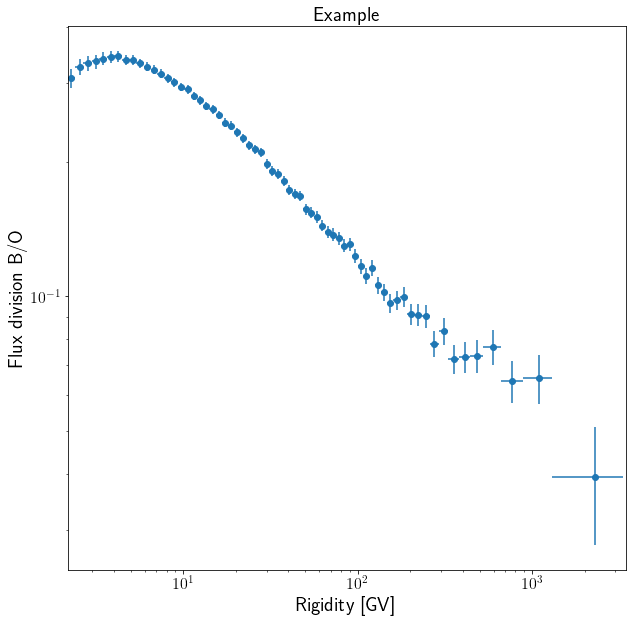

In [21]:
fnt=20
x1=rigidity[0]-0.1
x2=1.5*rigidity[-1]
#y1=ratio[0]
#y2=5*10**-1
plt.figure(figsize=(10,10))
plt.errorbar(rigidity,ratio,xerr=rigidity_binsize,yerr=ratio_errors,fmt='o',label="AMS")
#plt.plot(energy,he_3_4_2,'-o',label="L=2")
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity [GV]",fontsize=fnt)
plt.xticks(fontsize=fnt-4)
plt.yscale("log")
plt.ylabel("Flux division "+numerator+"/"+denominator,fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
#plt.ylim([y1,y2])
#plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example", fontsize=fnt)
plt.savefig(numerator+"_"+denominator+"_ams_data.png")
plt.show()